# Project on Oil vs Banks during resession

Several incident between 2007 and 2009 including oil price change from ~ 147 to ~ 32$ a barrel, and global financial crises effected world economy and GDP in 2009. A chain of these incidents caused several leading countries into recession. Let's see, how the stock price varies from 2006 to 2017 for some of the oil companies and banks in Canada. 

 We will also explore the ups and downs in the stock price of The United States Oil Fund (USO) and West Texas Intermediate Light Sweet Crude Oil. The United States Oil Fund is an exchange-traded fund that attempts to track the price of West Texas Intermediate Light Sweet Crude Oil (WTI). WTI is a grade of crude oil used as a benchmark in oil pricing.

Let's import some important libraries 

In [1]:
import warnings
warnings.simplefilter("ignore")

#Essential import for data analysis for visualization
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

#To read data directly from the API using pandas_reader:
# import pandas_datarearder.data as web

# Import for offline  interractive plotting
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

#Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

Let's read the datasets individually.

In [2]:
rbc = pd.read_csv('RBC.csv',index_col='Date', parse_dates=True) # Royal Bank of Canada
cibc = pd.read_csv('CIBC.csv',index_col='Date', parse_dates=True) # Canadian Imperial Bank of Commerce
bmo = pd.read_csv('BMO.csv',index_col='Date', parse_dates=True) # Bank of Montreal 
suncor = pd.read_csv('Suncor.csv',index_col='Date', parse_dates=True) # Suncor Energy Inc.
encana = pd.read_csv('Encana.csv',index_col='Date', parse_dates=True ) # Encana Corp.
cnq = pd.read_csv('CNQ.csv',index_col='Date', parse_dates=True ) # Canadian Natural Resource Ltd.
uso = pd.read_csv('USO.csv',index_col='Date', parse_dates=True) # United States Oil Fund LP (ETF)
wti = pd.read_csv('WTI.csv',index_col='Date', parse_dates=True) # WTI Oil price

Let's check the head and tail of any dataframe, suncor for instance.

In [3]:
suncor.head()

Open   High    Low  Close   Volume
Date                                           
2006-01-03  31.84  32.87  31.78  32.76  5568200
2006-01-04  32.76  33.14  32.15  33.09  4023400
2006-01-05  32.88  32.88  31.99  32.30  4247600
2006-01-06  32.75  33.76  32.51  33.31  4706200
2006-01-09  33.31  33.40  32.55  32.90  3770600

In [4]:
suncor.tail()

Open   High    Low  Close   Volume
Date                                           
2016-12-23  32.80  32.96  32.74  32.78  1717220
2016-12-27  32.79  33.04  32.66  32.90  1304542
2016-12-28  32.73  32.91  32.42  32.51  1437928
2016-12-29  32.53  32.92  32.50  32.77  1823569
2016-12-30  32.83  33.17  32.61  32.69  1646937

Let's combine banks (RBC, CIBC, BMO) and oil companies (Suncor, Encana, CNQ) datasets into a single dataset 'bo' ('b' for bank and 'o' for oil) and check the head of the dataset.

We going to use tickers = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ'] 
to add a hierarchical index at the outermost level of the data with the keys option in pd.concat().

In [5]:
#Tickers for the dataset
tickers = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ']

#Joining data
bo = pd.concat([rbc, cibc, bmo, suncor, encana, cnq], axis=1, keys=tickers)

# Let's have a data overview
bo.head()

RBC                                CIBC                       \
             Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

                    ...    Encana                                  CNQ         \
           Volume   ...      Open   High    Low  Close   Volume   Open   High   
Date                ...                                                         
2006-01-03  49400   ...     45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000   ...     46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200   ...     45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300   ...     45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900   ...     45.95  45.99  45.01  45.05  2878100  26.00  26.34   

                                   
              Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

The list of column headers or column name in 'bo'.

In [6]:
bo.columns.names

FrozenList([None, None])

To Give the column names, let's say 'Entity' and 'Stock'

In [7]:
bo.columns.names =(['Entity','Stock'])
bo.columns.names

FrozenList(['Entity', 'Stock'])

Let's check again head of bo.

In [8]:
bo.head()

Entity        RBC                                CIBC                       \
Stock        Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

Entity              ...    Encana                                  CNQ         \
Stock      Volume   ...      Open   High    Low  Close   Volume   Open   High   
Date                ...                                                         
2006-01-03  49400   ...     45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000   ...     46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200   ...     45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300   ...     45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900   ...     45.95  45.99  45.01  45.05  2878100  26.00  26.34   

Entity                             
Stock         Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

The maximum and minimum Close price for each bank's stock throughout the time period.

In [9]:
#Maximum close price
max_stock = bo.xs(key='Close',axis=1,level='Stock').max()
max_stock 

Entity
RBC        75.90
CIBC      108.24
BMO        78.03
Suncor     72.95
Encana     96.89
CNQ        53.70
dtype: float64

In [10]:
#Minimum close price
min_stock = bo.xs(key='Close',axis=1,level='Stock').min()
min_stock

Entity
RBC       20.62
CIBC      28.39
BMO       19.51
Suncor    14.66
Encana     3.01
CNQ       13.49
dtype: float64

Let's create a bar plots for max and min stock price, and we going to use subplots() and pass ncols = 2.

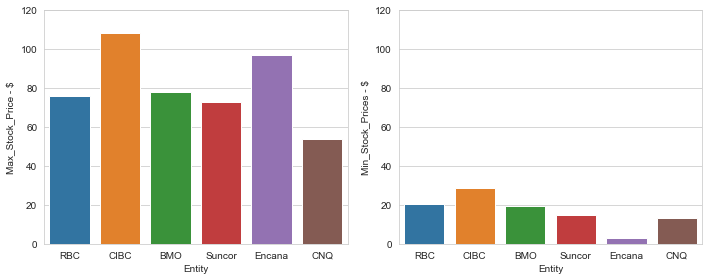

In [11]:
fig, axes = plt.subplots(ncols = 2, figsize=(10,4))
sns.barplot(max_stock.index, max_stock.values, ax=axes[0])
axes[0].set_ylim(0,120)
axes[0].set_ylabel('Max_Stock_Price - $')

sns.barplot(min_stock.index, min_stock.values, ax=axes[1])
axes[1].set_ylim(0,120)
axes[1].set_ylabel('Min_Stock_Prices - $')
plt.tight_layout()

Line plot gives the idea on how the stock value changes with time, let's plot 'Close' value of each stock in our data against time.

Let's create the plot using a for loop.

For the look, we have tickers = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ'].

Grab the column 'Close'.

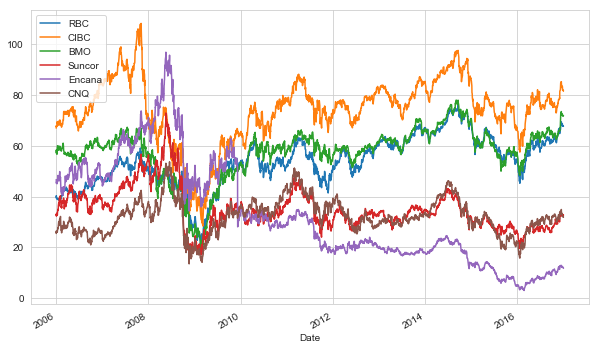

In [12]:
#for loop
for tick in tickers:
    bo[tick]['Close'].plot(figsize=(10,6),label=tick)
plt.legend()

The visualization of the plot above can be improved with interactive data plotting. We can select the entity we want to display on the plot.

We can use cross section.xs() method to plot interactive plot for our data.

In [13]:
bo.xs(key='Close',axis=1,level='Stock').iplot()

Let's check the head of wti

In [14]:
wti.head()

Value
Date             
2016-12-30  53.75
2016-12-29  53.80
2016-12-28  54.01
2016-12-27  52.82
2016-12-23  52.01

Set wti column from 'value' to 'Oil Price / Barrel' and display the head of the dataframe.

In [15]:
wti.columns = ['Oil Price / Barrel']
wti.head()

Oil Price / Barrel
Date                          
2016-12-30               53.75
2016-12-29               53.80
2016-12-28               54.01
2016-12-27               52.82
2016-12-23               52.01

All stock went down between 2008 and 2009,let's check the oil price and US oil fund stock, and let's figure out how did they change? 

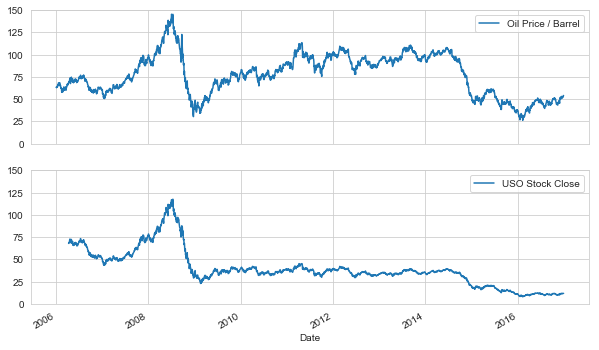

In [16]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)
wti[::-1].plot(ax=axes[0],ylim=(0,150)) 
uso['Close'].plot(ax=axes[1],ylim=(0,150), label = 'USO Stock Close')
plt.legend()

Let's create a new empty DataFrame called profit.

Calculate profit/return on investment for each entity in our dataframe and copy the values in newly created dataframe.

We will use pandas built-in pct_change() method on Close column with for loop.

In [17]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + 'Return'] = bo[tick]['Close'].pct_change()
returns.head()

RBCReturn  CIBCReturn  BMOReturn  SuncorReturn  EncanaReturn  \
Date                                                                       
2006-01-03        NaN         NaN        NaN           NaN           NaN   
2006-01-04   0.018944    0.014333   0.019389      0.010073     -0.008565   
2006-01-05  -0.021319   -0.006918  -0.014736     -0.023874     -0.023326   
2006-01-06  -0.005066    0.004002  -0.005913      0.031269      0.014153   
2006-01-09  -0.007128   -0.001624  -0.008572     -0.012309     -0.017662   

            CNQReturn  
Date                   
2006-01-03        NaN  
2006-01-04   0.037677  
2006-01-05  -0.027231  
2006-01-06   0.010886  
2006-01-09   0.006154

Plotting all data gives a good overview.

Let's create a pairplot using seaborn of our returns dataframe.

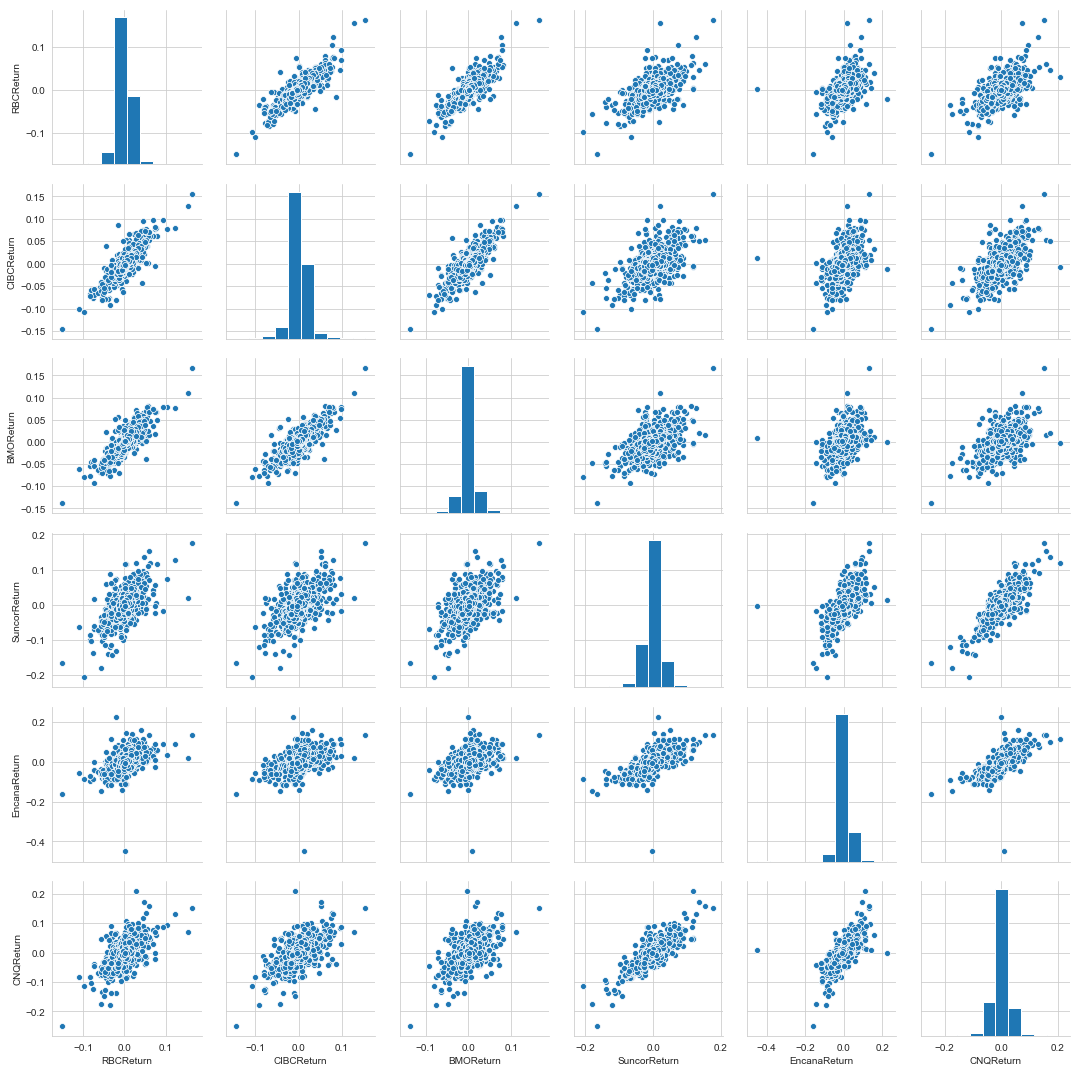

In [18]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:]) #avoiding NaN row

What is the best single day gain and the worst single day drop 
for each compagny/bank?

idxmax(): Return index of first occurrence of maximum over requested axis. NA/null values are excluded.

idxmin(): Return index of first occurrence of minimum over requested axis. NA/null values are excluded.



In [19]:
#Best Single day gain
returns.idxmax()

RBCReturn      2008-10-13
CIBCReturn     2008-10-13
BMOReturn      2008-10-13
SuncorReturn   2008-10-13
EncanaReturn   2016-02-24
CNQReturn      2008-11-21
dtype: datetime64[ns]

In [20]:
#worst single day drop
returns.idxmin()

RBCReturn      2008-11-20
CIBCReturn     2008-11-20
BMOReturn      2008-11-20
SuncorReturn   2009-01-20
EncanaReturn   2009-12-09
CNQReturn      2008-11-20
dtype: datetime64[ns]

Classyfing the riskiest stock over the entire time period.
 

In [21]:
returns.std()

RBCReturn       0.017404
CIBCReturn      0.018244
BMOReturn       0.016974
SuncorReturn    0.026503
EncanaReturn    0.029234
CNQReturn       0.028247
dtype: float64

Let us see the stock that we think was the riskiest for the year 2007 and how this changes for 2016?

Let's take a look at the past and current time.

We can use .ix[] or loc[] to get a slice of the data for the requested dates.
.ix is the most general indexer and will support any of the inputs in .loc and .iloc. .ix also supports floating point label schemes. .ix is exceptionally useful when dealing with mixed positional and label based hierarchical indexes.


In [22]:
#let's use .ix[] here to get the slice for the selected dates
returns.ix['2008-01-01':'2008-12-30'].std() # CNQ was the risk in 2008
#returns.loc['2008-01-01':'2008-12-30'].std() # CNQ was the risk in 2008

RBCReturn       0.031713
CIBCReturn      0.036268
BMOReturn       0.031502
SuncorReturn    0.049237
EncanaReturn    0.040976
CNQReturn       0.054149
dtype: float64

In [23]:
returns.ix['2016-01-01':'2016-12-30'].std() # Ecnana could not hold, very risky in 2016!
#returns.loc['2016-01-01':'2016-12-30'].std() # Ecnana could not hold, very risky in 2016!

RBCReturn       0.013636
CIBCReturn      0.013055
BMOReturn       0.012131
SuncorReturn    0.020997
EncanaReturn    0.046978
CNQReturn       0.027645
dtype: float64

Let's create few distplots using seaborn
Create a distplot using seaborn of Encana and CNQ returns in 2008.

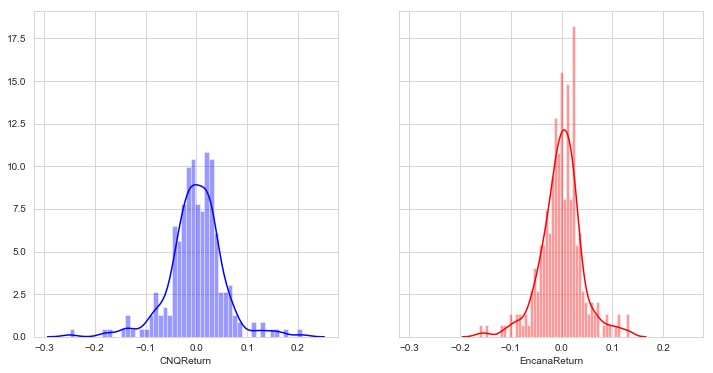

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
sns.distplot(returns.ix['2008-01-01':'2008-12-30']['EncanaReturn'],
             color='red',bins=50, ax=axes[1])
sns.distplot(returns.ix['2008-01-01':'2008-12-30']['CNQReturn'], 
             color='blue',bins=50, ax=axes[0])

Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Encana and CNQ stocks for the year 2008.

In [25]:
cnq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2006-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      2769 non-null float64
High      2769 non-null float64
Low       2769 non-null float64
Close     2769 non-null float64
Volume    2769 non-null int64
dtypes: float64(4), int64(1)
memory usage: 129.8 KB


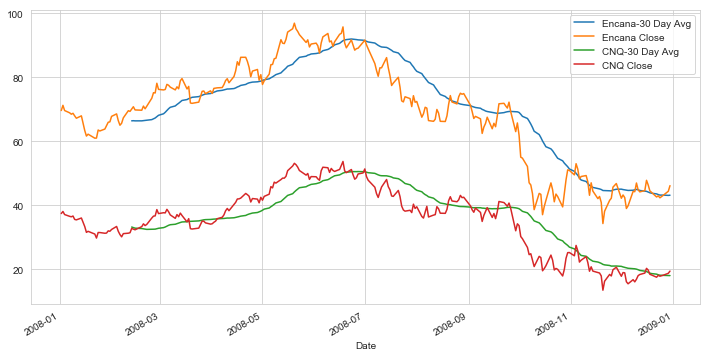

In [26]:
plt.figure(figsize=(12,6))
encana['Close'].ix['2008-01-01':'2008-12-30'].rolling(window=30).mean().plot(label='Encana-30 Day Avg')
encana['Close'].ix['2008-01-01':'2008-12-30'].plot(label='Encana Close')
cnq['Close'].ix['2008-01-01':'2008-12-30'].rolling(window=30).mean().plot(label='CNQ-30 Day Avg')
cnq['Close'].ix['2008-01-01':'2008-12-30'].plot(label='CNQ Close')
plt.legend()

We can present correlation by creating a heatmap.
Let's create one for the correlation between the stocks close price.

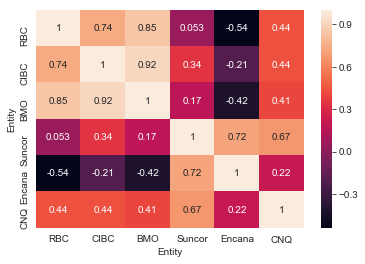

In [27]:
sns.heatmap(bo.xs(key='Close',axis=1,level='Stock').corr(),annot=True)

There is a correlation between Encana and the banks.

Let's plot the interactive heatmap

In [28]:
close_corr = bo.xs(key='Close', axis=1,level='Stock').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

Let's see the clustermap, how the correlations make clusters together for stock close price?

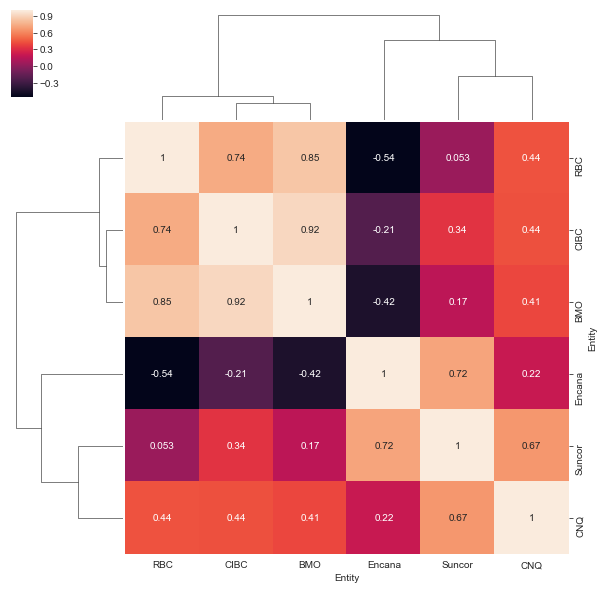

In [29]:
sns.clustermap(bo.xs(key='Close',axis=1,level='Stock').corr(),annot=True)

Let's create a candle plot for Encana stock for 2008.

candle or candlestick plot is a style of financial chart which need a dataset that contains open, high, low and close values for each time period we want to display.

In [30]:
encana[['Open', 'High', 'Low', 'Close']].ix['2008-01-01':'2008-12-31'].iplot(kind='candle')

Technical Analysis -- Use .ta_plot(study='sma') to create a Simple Moving Averages (SMA) plot of Encana for the year 2008. Pass in periods=[10,30,50]

In [31]:
encana['Close'].ix['2015-01-01':'2015-12-31'].ta_plot(
    study='sma',periods=[10,30,50],title='Simple Moving Averages')

There is another common type of data plotting,Bollinger Band. Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s.
Create Bollinger Band Plot for Encana for the year 2015. Use .ta_plot(study='boll')

In [32]:
encana['Close'].ix['2015-01-01':'2015-12-31'].ta_plot(study='boll')